# FAKE NEWS DETECTION

### Installing the Necessary Packages

In [1]:
!pip install wordcloud
!pip install opendatasets

# NLP

!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1!
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.0/12.0 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement beautifulsoup4==4.9.1! (from versions: 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.1.0, 4.1.1, 4.1.2, 4.1.3, 4.2.0, 4.2.1, 4.3.0, 4.3.1, 4.3.2, 4.4.0, 4.4.1, 4.5.0, 4.5.1, 4.5.2, 4.5.3, 4.6.0, 4.6.1, 4.6.2, 4.6.3, 4.7.0, 4.7.1, 4.8.0, 4.8.1, 4.8.2, 4.9.0, 4.9.1, 4.9.2, 4.9.3, 4.10.0, 4.11.0, 4.11.1)
ERROR: No matching distribution found for beautifulsoup4==4.9.1!

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\A.GOWTHAMI\AppData\Local\Temp\pip-req-build-5t6bpwk3'

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\a.gowthami\appdata\local\temp\pip-req-build-5t6bpwk3
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7683 sha256=89ab963c90968dc26a099101e7f44858ee425aed137256db9a6ac0af533e3d6b
  Stored in directory: C:\Users\A.GOWTHAMI\AppData\Local\Temp\pip-ephem-wheel-cache-y9ojs8vy\wheels\fd\71\47\e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


### Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import opendatasets as od 
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
import preprocess_kgptalkie as ps
import gensim  

C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Importing the Datasets

In [4]:
fake_news = pd.read_csv("Fake News Detection Dataset/Fake.csv")
real_news = pd.read_csv("Fake News Detection Dataset/True.csv")

### Exploring the Fake News Data

In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake_news.shape

(23481, 4)

In [7]:
fake_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [8]:
fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
fake_news['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [10]:
type(fake_news['text'].tolist())

list

### Visualizing the fake news data

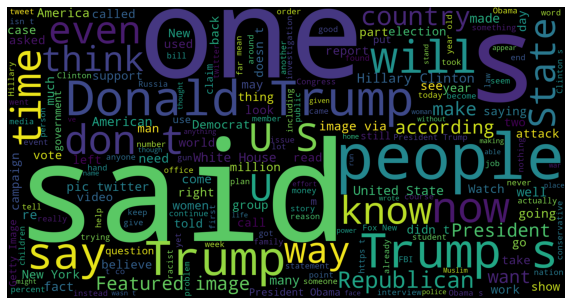

In [11]:
text = ' '.join(fake_news['text'].tolist())
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Exploring the True News Data

In [12]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
real_news.shape

(21416, 4)

In [14]:
real_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [15]:
real_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [16]:
real_news['subject'].value_counts()

politicsNews    11271
worldnews       10145
Name: subject, dtype: int64

In [17]:
type(real_news['text'].tolist())

list

### Visualizing the real news data

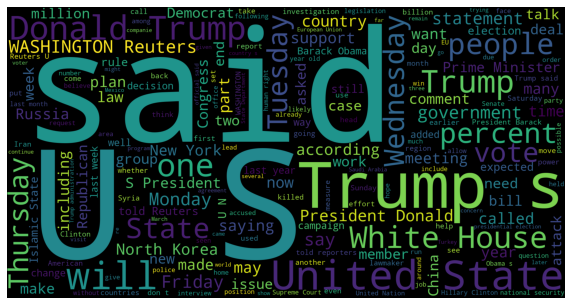

In [18]:
text = ' '.join(real_news['text'].tolist())
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Data Preprocessing
   

#### Real News

In [19]:
real_news.sample(5)

,title,text,subject,date
14984,Death toll in Iran's western province quake re...,ANKARA (Reuters) - At least 328 people were ki...,worldnews,"November 13, 2017"
11711,U.S. concerned by KRG security raid on local b...,BAGHDAD (Reuters) - The U.S. Embassy in Baghda...,worldnews,"December 20, 2017"
17486,"Pakistan's hostage rescue hailed, but tensions...",(This version of the story corrects spelling ...,worldnews,"October 13, 2017"
15877,Niger defense minister asks U.S. to deploy arm...,(This Nov. 1 story refiles to fix typo in aut...,worldnews,"November 1, 2017"
3242,Attorney General Sessions to talk publicly to ...,WASHINGTON (Reuters) - U.S. Attorney General J...,politicsNews,"June 11, 2017"


Some texts contain information like "WASHINGTON(Reuters)" which are split and placed in a separate column named Publisher 

In [20]:
unknown_publishers = []
for index, row in enumerate(real_news.text.values):
    try:
        record = row.split(' - ', maxsplit=1)
        record[1]
        
        assert(len(record[0])<260)
    except:
        unknown_publishers.append(index)

In [21]:
len(unknown_publishers)

34

In [22]:
print(real_news.iloc[6]) #known publisher
print("------------------------+--------------------------------------------")
print(real_news.iloc[7]) #unknown

title      Trump says Russia probe will be fair, but time...
text       WEST PALM BEACH, Fla (Reuters) - President Don...
subject                                         politicsNews
date                                      December 29, 2017 
Name: 6, dtype: object
------------------------+--------------------------------------------
title      Factbox: Trump on Twitter (Dec 29) - Approval ...
text       The following statements were posted to the ve...
subject                                         politicsNews
date                                      December 29, 2017 
Name: 7, dtype: object


In [23]:
unknown_publishers = []
for index, row in enumerate(real_news.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]
        
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [24]:
len(unknown_publishers)

221

In [25]:
unknown_publishers

[7,
 8,
 12,
 13,
 14,
 17,
 27,
 40,
 67,
 70,
 97,
 122,
 140,
 155,
 156,
 192,
 222,
 233,
 252,
 257,
 284,
 308,
 321,
 362,
 384,
 412,
 453,
 459,
 495,
 531,
 838,
 851,
 1076,
 1081,
 1112,
 1146,
 1179,
 1341,
 1381,
 1451,
 1509,
 1522,
 1523,
 1539,
 1570,
 1611,
 1645,
 1657,
 1659,
 1696,
 1711,
 1726,
 1730,
 1748,
 1768,
 1824,
 1826,
 1878,
 1885,
 1932,
 1952,
 1967,
 2012,
 2023,
 2056,
 2087,
 2100,
 2102,
 2120,
 2140,
 2171,
 2187,
 2247,
 2262,
 2275,
 2313,
 2315,
 2355,
 2383,
 2392,
 2442,
 2486,
 2510,
 2518,
 2557,
 2602,
 2658,
 2776,
 2811,
 2855,
 2885,
 2922,
 3107,
 3248,
 3270,
 3466,
 3488,
 3597,
 3615,
 3782,
 3835,
 3930,
 3944,
 3976,
 4170,
 4198,
 4206,
 4307,
 4358,
 4465,
 4554,
 4753,
 5246,
 5290,
 5316,
 5379,
 5380,
 5412,
 5504,
 5538,
 5588,
 5593,
 5633,
 5761,
 5784,
 5794,
 5796,
 5823,
 5866,
 5997,
 6026,
 6065,
 6075,
 6524,
 6573,
 6660,
 6823,
 7259,
 7353,
 7463,
 7568,
 7715,
 7766,
 7816,
 7890,
 7915,
 7922,
 8118,
 8127,
 8

Some Random Unknown Publisher

In [26]:
real_news.iloc[1081]

title      Factbox: Trump on Twitter (Oct 23) - 401(k), N...
text       The following statements were posted to the ve...
subject                                         politicsNews
date                                       October 23, 2017 
Name: 1081, dtype: object

In [27]:
real_news.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20134     (Story corrects to million from billion in pa...
20499     (This Sept 8 story corrects headline, clarifi...
20666     (Story refiles to add dropped word  not , in ...
21245     (Story corrects third paragraph to show Mosul...
21338     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 221, dtype: object

In [28]:
publisher =[]
tmp_text = []

for index, row in enumerate(real_news.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
        
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [29]:
real_news['publisher'] = publisher
real_news['text'] = tmp_text

In [30]:
real_news.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [31]:
real_news.shape

(21416, 5)

#### Fake News

In [32]:
empty_fake_index = [index for index,text in enumerate(fake_news.text.tolist()) if str(text).strip()==""]

In [33]:
fake_news.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [34]:
#Adding the title and text into the text column

real_news['text'] = real_news['title']+" "+ real_news['text'] 
fake_news['text'] = fake_news['title']+" "+ fake_news['text'] 

In [35]:
#Converting the text column into lowercase

real_news['text'] = real_news['text'].apply(lambda x: str(x).lower())
fake_news['text'] = fake_news['text'].apply(lambda x: str(x).lower())

In [36]:
real_news.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [37]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends out embarrassing new year’...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump is so obsessed he even has obama’s name...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump dur...,News,"December 25, 2017"


#### One Hot Encoding 

In [38]:
real_news['class']=1
fake_news['class']=0

In [39]:
real_news.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [40]:
real = real_news[['text','class']]
fake = fake_news[['text','class']]

#### Concatenating the two dataframes into one dataframe

In [41]:
data = real.append(fake, ignore_index=True)
data.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


### Natural Language Processing
    Here NLTK package is used. It is a python library that can we used to perform all the NLP tasks

In [42]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [43]:
ps.remove_special_chars('this,.@# is gre*at') #Removing the punctuations , special characters present

'this is great'

#### Vectorization 
    After cleaning the text we need to convert the text into some kind of numerical representation called vectors so that we can feed the data to a machine learning model for further processing.

In [44]:
y = data['class'].values

In [45]:
X = [d.split() for d in data['text'].tolist()]

In [46]:
type(X)

list

In [47]:
type(X[0])

list

In [48]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

Gensim library will enable us to develop word embeddings. Word2Vec is an algorithm that converts a word into vectors such that it groups similar words together into vector space. It is widely used in many applications like document retrieval, machine translation systems, autocompletion and prediction

In [49]:
DIM = 100 # sequence of 100 vectors
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window =10, min_count=1)

In [50]:
w2v_model.wv['india'] # get numpy vector of a word

array([-0.75100094,  0.09762604, -1.8080163 ,  2.7835433 ,  2.944627  ,
       -3.5755901 , -1.677053  ,  2.014792  , -2.6517506 ,  0.62283766,
       -0.859102  ,  1.4296676 , -1.7719189 , -1.7575921 ,  2.5754218 ,
        1.9137367 , -1.2198231 ,  1.3255146 ,  0.24107492,  0.2868341 ,
        0.53218275,  1.1912564 , -1.7329311 , -0.17589372,  2.3803084 ,
       -0.7664957 ,  1.570955  , -1.5638442 ,  0.02850899, -0.21527536,
        2.4280457 ,  0.5594261 , -0.5955507 ,  1.2448305 , -2.2516627 ,
        0.3928752 , -2.0244877 ,  1.0543958 ,  0.07885053,  1.7833492 ,
       -0.17595309, -3.4770737 ,  1.563984  , -0.16071157,  0.06460246,
       -0.11820157,  0.09474109,  0.79051805, -0.26730043,  0.30737105,
       -1.1633625 , -0.56380486,  0.9762772 , -1.9845805 ,  0.5705378 ,
       -0.01992035,  0.8446531 ,  0.27449143, -0.36325583, -2.3091261 ,
        0.7516805 , -0.69683397, -0.57920134, -0.4488831 ,  2.183701  ,
        0.58681256, -1.0026088 ,  2.355931  ,  0.9105263 ,  0.28

In [51]:
w2v_model.wv.most_similar('india') # get other similar words

[('pakistan', 0.7106001377105713),
 ('malaysia', 0.6800657510757446),
 ('modi', 0.6541374921798706),
 ('china', 0.6530689597129822),
 ('indian', 0.6510942578315735),
 ('beijings', 0.6284264922142029),
 ('norway', 0.6246475577354431),
 ('maritime', 0.6143091320991516),
 ('thailand', 0.6105587482452393),
 ('indonesia', 0.6064192652702332)]

In [52]:
w2v_model.wv.most_similar('china')

[('beijing', 0.8411238789558411),
 ('taiwan', 0.8062789440155029),
 ('chinas', 0.7890810966491699),
 ('chinese', 0.713901162147522),
 ('beijings', 0.686116099357605),
 ('japan', 0.6789894104003906),
 ('pyongyang', 0.6688634753227234),
 ('india', 0.6530690789222717),
 ('waterway', 0.6326066255569458),
 ('xi', 0.6244419813156128)]

In [53]:
w2v_model.wv.most_similar('usa')

[('elsewherein', 0.5204201936721802),
 ('unimas', 0.4927133321762085),
 ('2010now', 0.4919220209121704),
 ('weekenduntil', 0.48734357953071594),
 ('pictwittercomzkutv76jll', 0.48057323694229126),
 ('biz', 0.4754406213760376),
 ('todaypresident', 0.47188490629196167),
 ('flopped', 0.46947845816612244),
 ('korn', 0.467365562915802),
 ('twocrossed', 0.46672022342681885)]

In [54]:
w2v_model.wv.most_similar('gandhi')

[('75yearold', 0.6777452826499939),
 ('rahul', 0.6704615950584412),
 ('firebrand', 0.658125638961792),
 ('grillo', 0.653676450252533),
 ('loyalist', 0.6443537473678589),
 ('jamiat', 0.6387497186660767),
 ('novice', 0.6275042295455933),
 ('thabo', 0.6204384565353394),
 ('69yearold', 0.6082528829574585),
 ('flagbearer', 0.6081541180610657)]

#### Tokenization 

    It is the process of dividing the whole text into tokens.

In [55]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [56]:
X = tokenizer.texts_to_sequences(X)

In [57]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [58]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [59]:
# Example
len(X[101])

1000

vocab size + 1 = there are many words that are not present in tokens so this method will make them unknown words, create another sequence

In [60]:
vocab_size = len(tokenizer.word_index)+1
vocab =tokenizer.word_index

In [61]:
# Get the vectors
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    
    return weight_matrix
    

In [62]:
embedding_vectors = get_weight_matrix(w2v_model)

In [63]:
embedding_vectors.shape

(231912, 100)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### CNN (Convolutional Neural Network)

In [65]:
model = Sequential()
model.add(Dense(500, activation = "relu", input_dim =maxlen))
model.add(Dense(350, activation = "relu"))
model.add(Dense(150, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [66]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [67]:
model.fit(X_train, y_train, validation_split=0.3, epochs=20)

Epoch 1/20
737/737 [==============================] - 6s 7ms/step - loss: 113.6736 - accuracy: 0.5823 - val_loss: 14.1438 - val_accuracy: 0.6306
Epoch 2/20
737/737 [==============================] - 5s 7ms/step - loss: 7.9581 - accuracy: 0.6651 - val_loss: 11.7558 - val_accuracy: 0.6160
Epoch 3/20
737/737 [==============================] - 5s 6ms/step - loss: 3.5494 - accuracy: 0.7360 - val_loss: 5.6625 - val_accuracy: 0.6588
Epoch 4/20
737/737 [==============================] - 5s 7ms/step - loss: 2.7436 - accuracy: 0.7725 - val_loss: 6.5410 - val_accuracy: 0.6385
Epoch 5/20
737/737 [==============================] - 7s 10ms/step - loss: 2.1008 - accuracy: 0.7946 - val_loss: 7.9514 - val_accuracy: 0.6116
Epoch 6/20
737/737 [==============================] - 8s 11ms/step - loss: 2.3578 - accuracy: 0.7926 - val_loss: 4.0839 - val_accuracy: 0.7004
Epoch 7/20
737/737 [==============================] - 6s 8ms/step - loss: 1.4653 - accuracy: 0.8189 - val_loss: 2.6425 - val_accuracy: 0.7135


In [68]:
pred = model.predict(X_test)

351/351 [==============================] - 1s 3ms/step


In [69]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [70]:
accuracy_score(y_test,pred)

0.7965256124721604

In [71]:
print(f'Accuracy on testing set: {accuracy_score(y_test,pred).round(4)*100}%')
print(f'Precision on testing set: {precision_score(y_test,pred).round(4)*100}%')
print(f'Recall on testing set: {recall_score(y_test,pred).round(4)*100}%')

Accuracy on testing set: 79.65%
Precision on testing set: 80.25999999999999%
Recall on testing set: 76.48%


In [72]:
cv_report = classification_report(y_test,pred,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5830
           1       0.80      0.76      0.78      5395

    accuracy                           0.80     11225
   macro avg       0.80      0.80      0.80     11225
weighted avg       0.80      0.80      0.80     11225



In [73]:
cm_cv = confusion_matrix(y_test,pred)
cm_cv

array([[4815, 1015],
       [1269, 4126]], dtype=int64)

In [74]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

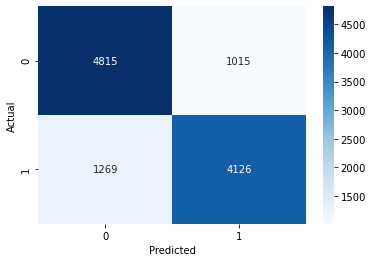

In [75]:
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

### RNN (Recurrent Neural Network)

In [76]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 128))
model1.add(Bidirectional(LSTM(64, return_sequences = True)))
model1.add(Bidirectional(LSTM(32)))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation = "sigmoid"))

In [77]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         29684736  
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [78]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10


C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1011/1011 [==============================] - 7s 6ms/step - loss: 0.1804 - accuracy: 0.9409 - val_loss: 0.4386 - val_accuracy: 0.8272
Epoch 2/10
1011/1011 [==============================] - 10s 10ms/step - loss: 0.1030 - accuracy: 0.9695 - val_loss: 0.6233 - val_accuracy: 0.8219
Epoch 3/10
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0711 - accuracy: 0.9830 - val_loss: 0.8477 - val_accuracy: 0.8067


In [79]:
model.evaluate(X_test, y_test)

351/351 [==============================] - 2s 4ms/step - loss: 0.4699 - accuracy: 0.8343


[0.46991509199142456, 0.8342984318733215]

In [80]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

351/351 [==============================] - 2s 6ms/step


In [81]:
print(f'Accuracy on testing set: {accuracy_score(binary_predictions, y_test).round(4)*100}%')
print(f'Precision on testing set: {precision_score(binary_predictions, y_test).round(4)*100}%')
print(f'Recall on testing set: {recall_score(binary_predictions, y_test).round(4)*100}%')

Accuracy on testing set: 83.43%
Precision on testing set: 89.38000000000001%
Recall on testing set: 78.93%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

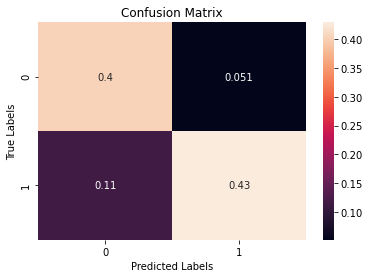

In [82]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

### LSTM (Long Short-Term Memory networks)

In [83]:
model2 = Sequential()
model2.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable = False))
model2.add(LSTM(units=128, return_sequences = True))
model2.add(LSTM(units=16))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [84]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23191200  
                                                                 
 lstm_2 (LSTM)               (None, 1000, 128)         117248    
                                                                 
 lstm_3 (LSTM)               (None, 16)                9280      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 23,317,745
Trainable params: 126,545
Non-trainable params: 23,191,200
_________________________________________________________________


In [85]:
model2.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 1237s 2s/step - loss: 0.1368 - acc: 0.9522 - val_loss: 0.0480 - val_acc: 0.9844
Epoch 2/6
737/737 [==============================] - 1098s 1s/step - loss: 0.0616 - acc: 0.9798 - val_loss: 0.0432 - val_acc: 0.9859
Epoch 3/6
737/737 [==============================] - 1070s 1s/step - loss: 0.0396 - acc: 0.9882 - val_loss: 0.0519 - val_acc: 0.9852
Epoch 4/6
737/737 [==============================] - 1102s 1s/step - loss: 0.0206 - acc: 0.9939 - val_loss: 0.0189 - val_acc: 0.9940
Epoch 5/6
737/737 [==============================] - 1189s 2s/step - loss: 0.0113 - acc: 0.9966 - val_loss: 0.0222 - val_acc: 0.9917
Epoch 6/6
737/737 [==============================] - 1076s 1s/step - loss: 0.0078 - acc: 0.9976 - val_loss: 0.0178 - val_acc: 0.9933


In [86]:
y_pred = (model2.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 114s 319ms/step


In [87]:
accuracy_score(y_test, y_pred)

0.9948329621380846

In [88]:
print(f'Accuracy on testing set: {accuracy_score(y_test,y_pred).round(4)*100}%')
print(f'Precision on testing set: {precision_score(y_test,y_pred).round(4)*100}%')
print(f'Recall on testing set: {recall_score(y_test,y_pred).round(4)*100}%')

Accuracy on testing set: 99.48%
Precision on testing set: 99.15%
Recall on testing set: 99.78%


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5830
           1       0.99      1.00      0.99      5395

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

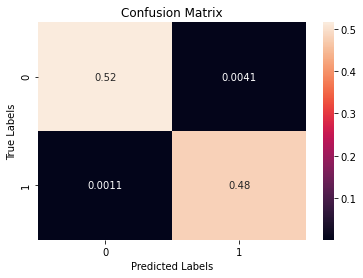

In [90]:
matrix = confusion_matrix(y_test, y_pred, normalize='all')
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])